In [1]:
import os
import umap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.text import Text
import seaborn as sns; sns.set_style("white")
import matplotlib as mpl
# import umap.plot
from sklearn.decomposition import PCA

%matplotlib inline
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42


# Set current working directory
print(os.getcwd())
os.chdir('/share/data/analyses/christa/colopaint3D/spher_colo52_v1/3_Figure2/RemoveNoise')
print(os.getcwd())


cell_line = "HCT116"



/home/jovyan/share/data/analyses/christa/.venv/lib/python3.10/site-packages/umap/__init__.py:36: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


/share/data/analyses/christa/colopaint3D/spher_colo52_v1/3_Figure2/RemoveNoise
/share/data/analyses/christa/colopaint3D/spher_colo52_v1/3_Figure2/RemoveNoise


In [2]:
def pDose(x):
    '''This is just a helper function, to compute easily log transformed concentrations used in drug discovery'''
    return(-np.log10(1e-6*x))
def inverse_pDose(y):
    '''Inverse function of pDose'''
    return 10**(-y) / 1e-6
def list_features(df):
    # List features
    list_of_selected_features = list(df.columns.values)
    list_of_metadata = list(df.columns[df.columns.str.contains("Metadata_")])
    list_of_selected_features = list(set(list_of_selected_features) - set(list_of_metadata))
    return list_of_selected_features

In [3]:
# Set up the plotting parameters
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
dpi = 300
figformat = 'pdf'

In [4]:
# Load the data

# file = '1_Data/results/normalized_data_HCT116.csv' # Old file with slice normalization
# file = '1_Data/results/normalized_data_no_slice_HCT116.csv' # Old file without slice normalization
file = '/home/jovyan/share/data/analyses/christa/colopaint3D/spher_colo52_v1/1_Data/results/normalized_data_merged_HCT116.csv'
data = pd.read_csv(file)
data = data.query('Metadata_name == "dmso"')
cmap = sns.color_palette("YlOrRd",
                         n_colors=len(data['Metadata_Site'].unique()))

In [5]:
# Calculate the PCA embedding
training_data = data.loc[:, list_features(data)].values
# Perform PCA
pca = PCA(n_components=2)
pca.fit(training_data)
embedding= pca.transform(training_data)

variance_explained = pca.explained_variance_ratio_ * 100  # Convert to percentage


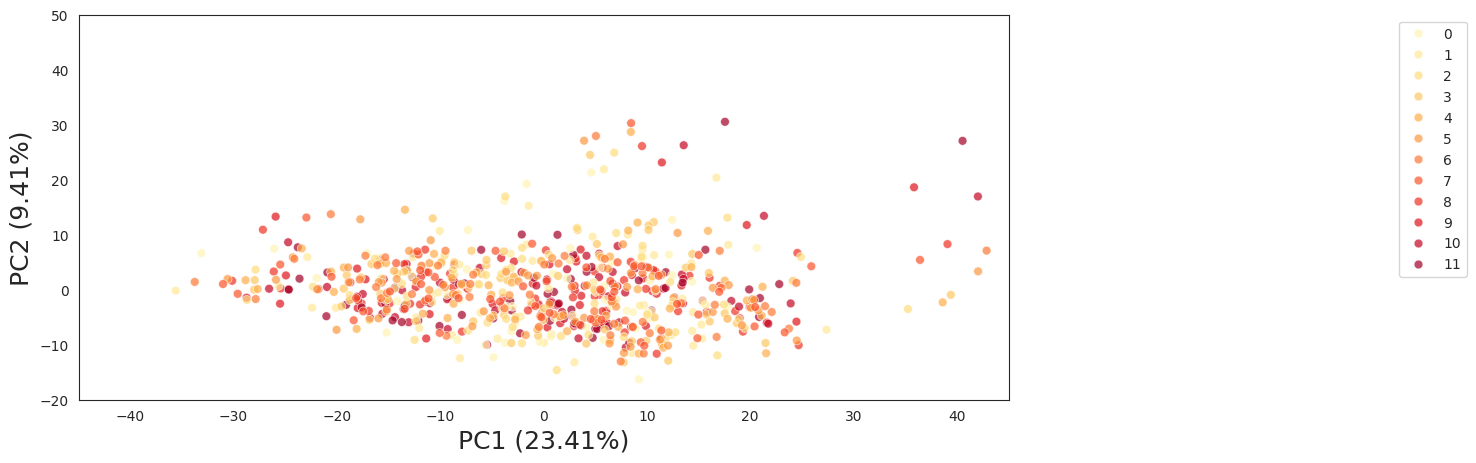

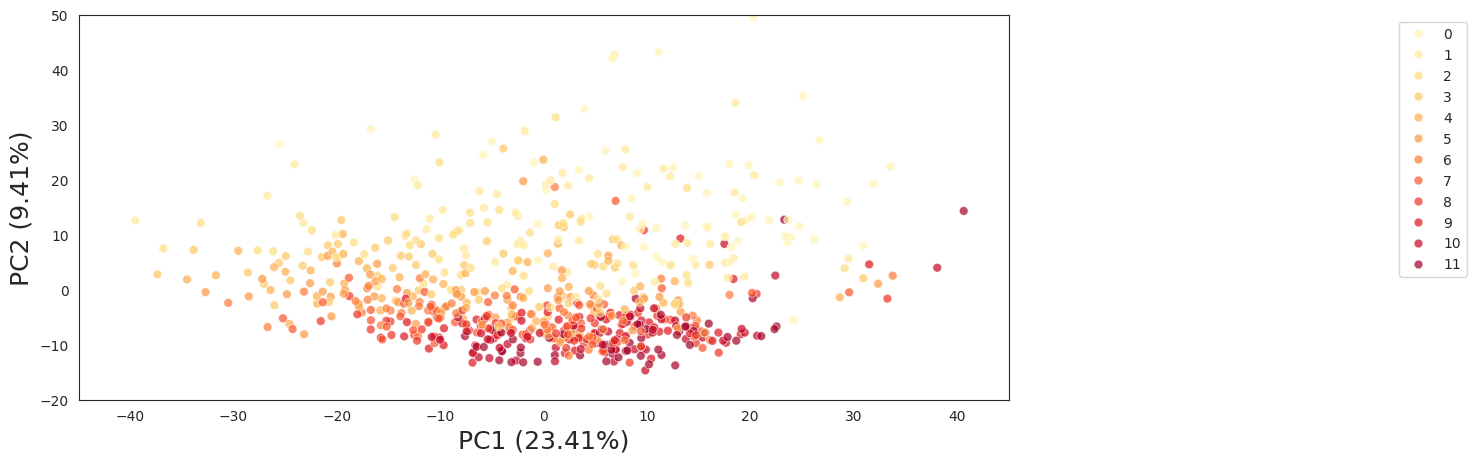

In [ ]:
norm_categories = data['Metadata_normalization'].unique()


for cat in norm_categories:

    subset_mask = data['Metadata_normalization'] == cat
    embedding1 = embedding[subset_mask]
    data1 = data[subset_mask]

    ## Pathways
    ## PCA - Pathway
    fig = plt.figure(figsize=(12, 5))
    ax = sns.scatterplot(
        x=embedding1[:, 0],
        y=embedding1[:, 1],
        hue=data1.Metadata_Site,
        alpha=(0.7),
        marker="o",
        palette=cmap,
        s=40,
        #size=df_toplot["Metadata_cmpd_conc"],
        #palette=pal,
        #legend=False
    )
    plt.legend(bbox_to_anchor=(1.5, 1), loc='upper right')

    # Add variance explained to axis labels
    plt.xlabel(f'PC1 ({variance_explained[0]:.2f}%)', size=18)
    plt.ylabel(f'PC2 ({variance_explained[1]:.2f}%)', size=18)


    plt.xlim(-45, 45)
    plt.ylim(-20, 50)

    # plt.title('Slices - norm' + ' - ' + cell_line)
    plt.show()

    fig.savefig("PCA_aggregates_{}_{}.{}".format(cat, cell_line, figformat),
                dpi=dpi,
                bbox_inches="tight")

In [7]:
# ## PCA - Pathway
# fig = plt.figure(figsize=(12,5))
# ax = sns.scatterplot(
#     x=embedding[:, 0],
#     y=embedding[:, 1],
#     hue=data.Metadata_Site,
#     alpha=(0.7),
#     marker="o",
#     palette=cmap,
#     s=40,
#     #size=df_toplot["Metadata_cmpd_conc"],
#     #palette=pal,
#     #legend=False
#     )
# plt.legend(bbox_to_anchor=(1.5, 1), loc='upper right')

# # Add variance explained to axis labels
# plt.xlabel(f'PC1 ({variance_explained[0]:.2f}%)')
# plt.ylabel(f'PC2 ({variance_explained[1]:.2f}%)')

# plt.title('Site - no_norm' + ' - ' + cell_line)
# plt.show()
# # fig.savefig(
# #         "PCA_aggregates_noslicenorm_{}.{}".format(cell_line, figformat), dpi=dpi, bbox_inches="tight"
# #         )